In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sfm.plotstyle import set_seaborn_style, set_style_after

import os

In [2]:
# list all runs in runs/
# Get current notebook path since __file__ isn't defined in notebooks
currentfile = os.path.abspath('')
currentdir = os.path.dirname(currentfile)
runs = os.listdir(f"{currentdir}/runs")
print(runs)

# filter for target distributions
targetdist = "moons"
runs = [run for run in runs if f"-{targetdist}" in run]

# order alphabetically
runs = sorted(runs)
print(runs)


['gaussian-mnist-ot', 'beta-moons', 'beta-moons-ot', 'gaussian-moons', 'datafittednormal-mnist-ot', 'multivariate-mnist-ot', 'gamma-mnist-ot', 'dirichlet-moons-ot', 'gamma-moons', 'mog-moons', 'diagonal-moons-ot', 'laplace-mnist-ot', '8gaussians-mnist-ot', 'cauchy-moons', 'multivariate-moons', '8gaussians-mnist', 'laplace-mnist', 'gamma-mnist', 'normal-moons-ot', 'beta-mnist-ot', 'diagonal-moons', 'beta-mnist', 'multivariate-moons-ot', 'dirichlet-moons', '8gaussians-moons', 'diagonal-mnist', 'mog-mnist-ot', 'multivariate-mnist', 'uniform-mnist-ot', 'uniform-moons-ot', 'gaussian-moons-ot', 'normal-mnist-ot', 'gaussian-mnist', 'datafittednormal-mnist', 'cauchy-moons-ot', 'diagonal-mnist-ot', 'laplace-moons-ot', 'mog-mnist', 'laplace-moons', '8gaussians-moons-ot', 'uniform-moons', 'gamma-moons-ot', 'datafittednormal-moons-ot', 'uniform-mnist', 'normal-mnist', 'normal-moons', 'mog-moons-ot']
['8gaussians-moons', '8gaussians-moons-ot', 'beta-moons', 'beta-moons-ot', 'cauchy-moons', 'cauchy-

In [3]:
# list files in first run
files = os.listdir(f"{currentdir}/runs/{runs[0]}")
print(files)


['traj_2999_is100.png', 'train', 'gif', 'targetdist.png', 'sidebyside', 'traj_5999_is100.png', 'traj_8gaussians-to-moons.gif', 'traj_9999_is100.png', 'traj_6999_is100.png', 'losses.npy', 'traj_1999_is100.png', 'logprobs_is100.npy', 'traj_999_is100.png', 'traj_0_is100.png', 'traj_4999_is100.png', 'mysimplemlp_10000.pth', 'integrationsteps', 'traj_8999_is100.png', 'logprob_8gaussians-to-moons_sidebyside.png', 'srctrgt.png', 'traj_8gaussians-to-moons_is11.gif', 'trajectory', 'logprobs_train.npy', 'traj_7999_is100.png', 'traj_3999_is100.png']


In [4]:
exclude = ["dirichlet", "beta", "gamma", "multivariate"]
filtered_runs = [run for run in runs if not any(e in run for e in exclude)]


8gaussians


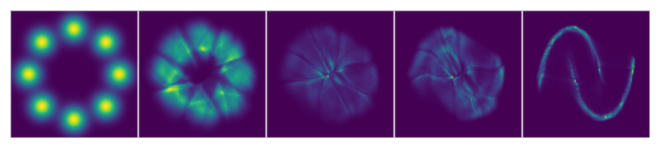

8gaussians OT


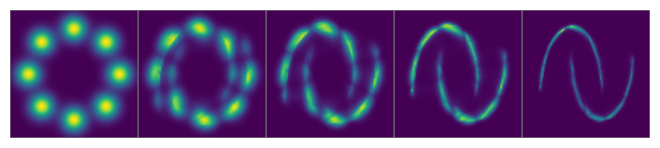

cauchy


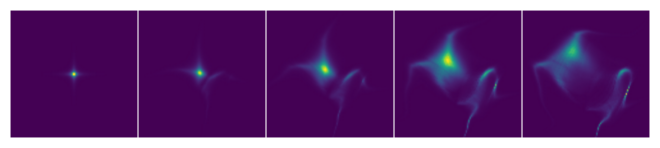

cauchy OT
File /ssd/gen/fm/runs/cauchy-moons-ot/logprob_cauchy-to-moons_sidebyside.png or /ssd/gen/fm/runs/cauchy-moons-ot/logprob_sidebyside.png does not exist
datafittednormal OT
File /ssd/gen/fm/runs/datafittednormal-moons-ot/logprob_datafittednormal-to-moons_sidebyside.png or /ssd/gen/fm/runs/datafittednormal-moons-ot/logprob_sidebyside.png does not exist
diagonal


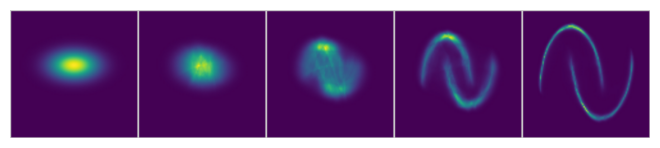

diagonal OT


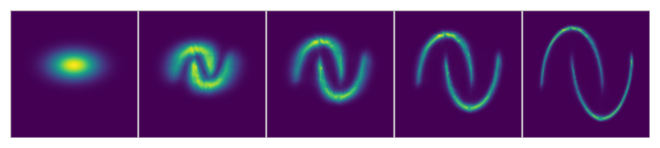

gaussian


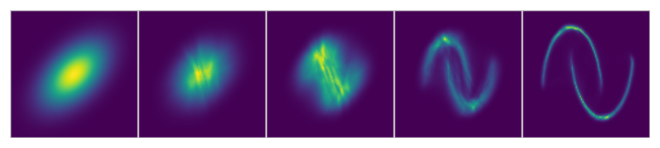

gaussian OT


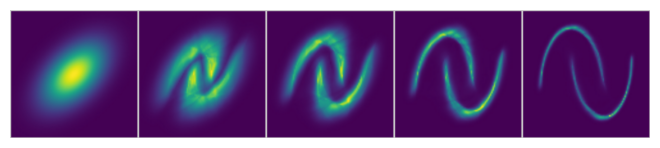

laplace


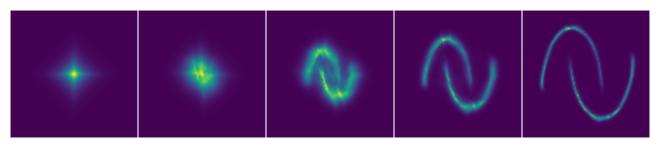

laplace OT


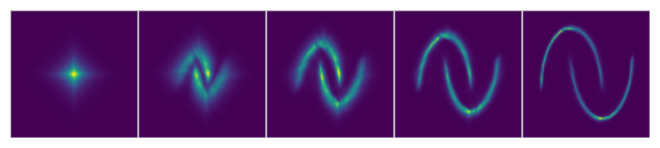

mog


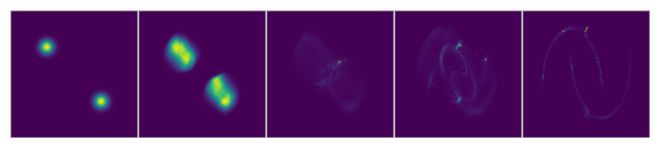

mog OT


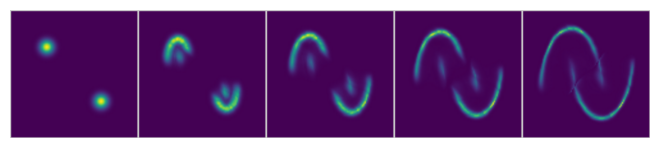

normal


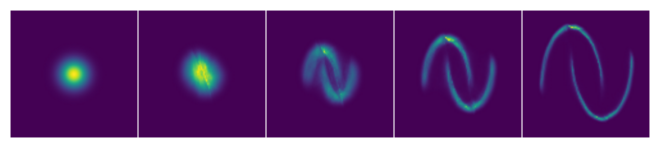

normal OT


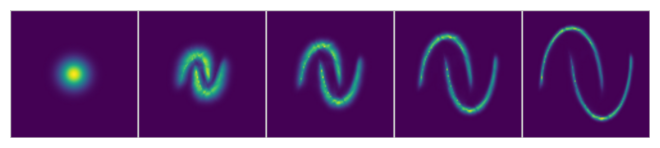

uniform


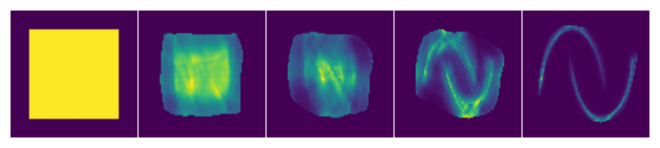

uniform OT


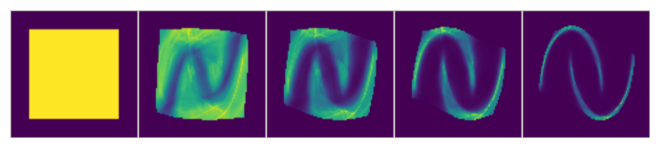

In [5]:
# for every run, show logprob_<src>-to-<trgt>_sidebyside.png
for run in filtered_runs:
    src = run.split("-")[0]
    trgt = run.split("-")[1]  
    runname = src
    if "-ot" in run:
        runname += " OT"
    print(runname)
    fname1 = f"{currentdir}/runs/{run}/logprob_{src}-to-{trgt}_sidebyside.png"
    fname2 = f"{currentdir}/runs/{run}/logprob_sidebyside.png"
    if os.path.exists(fname1):
        plt.imshow(plt.imread(fname1))
    elif os.path.exists(fname2):
        plt.imshow(plt.imread(fname2))
    else:
        print(f"File {fname1} or {fname2} does not exist")
        continue
    # remove axes
    plt.axis('off')
    # remove ticks
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    plt.tight_layout(pad=0)
    plt.show()


In [6]:
# only ot runs
runsfiltered = [run for run in runs if "-ot" in run]

# exclude dirichlet, beta
exclude = ["dirichlet", "beta", "gamma"]
runsfiltered = [run for run in runsfiltered if not any(e in run for e in exclude)]

print(runsfiltered)


['8gaussians-moons-ot', 'cauchy-moons-ot', 'datafittednormal-moons-ot', 'diagonal-moons-ot', 'gaussian-moons-ot', 'laplace-moons-ot', 'mog-moons-ot', 'multivariate-moons-ot', 'normal-moons-ot', 'uniform-moons-ot']


In [7]:
# get logprobs_train.npy and losses.npy for every run into a dict
logprobs_train = {}
losses = {}
for run in runsfiltered:
    fname = f"{currentdir}/runs/{run}/logprobs_train.npy"
    if os.path.exists(fname):
        logprobs_train[run] = np.load(fname)
    else:
        print(f"File {fname} does not exist")
        continue
    losses[run] = np.load(f"{currentdir}/runs/{run}/losses.npy")


File /ssd/gen/fm/runs/cauchy-moons-ot/logprobs_train.npy does not exist
File /ssd/gen/fm/runs/datafittednormal-moons-ot/logprobs_train.npy does not exist


In [8]:
def get_human_name(_run):
    _run = _run.replace(f"-{targetdist}", "")
    ot = True if "-ot" in _run else False
    _run = _run.replace("-ot", "")
    _namesdict = {
        "dirichlet": "Dirichlet",
        "beta": "Beta",
        "gamma": "Gamma",
        "mog": "2Gaussians",
        "multivariate": "Multivariate",
        "8gaussians": "8Gaussians",
        "diagonal": "DiagGaussian",
        "laplace": "Laplace",
        "uniform": "Uniform",
        "gaussian": "Gaussian",
        "normal": "Normal",
    }
    if _run in _namesdict:
        return f"{_namesdict[_run]}{' OT' if ot else ''}"
    else:
        return _run


In [9]:
# every model its own color
colors = sns.color_palette("deep", len(runsfiltered))
_cmap = {run: colors[i] for i, run in enumerate(runsfiltered)}

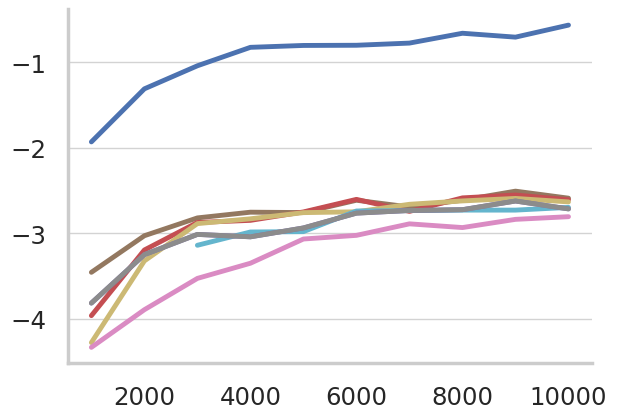

In [10]:
# plot logprobs_train.npy for every run
set_seaborn_style()
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
# ax.set_yscale("symlog")
# the higher the logprob the better
_runsfiltered = logprobs_train.keys()
_runsfiltered = sorted(_runsfiltered, key=lambda x: -logprobs_train[x][-1, 1])
for run in _runsfiltered:
    # first column is x, second column is y
    ax.plot(
        logprobs_train[run][1:, 0], logprobs_train[run][1:, 1], 
        label=get_human_name(run),
        color=_cmap[run]
    )
# y log scale
set_style_after(ax, legend=False, loc="upper right", bbox_to_anchor=(1.0, .93), fs=10)
plt.show()
plt.close()

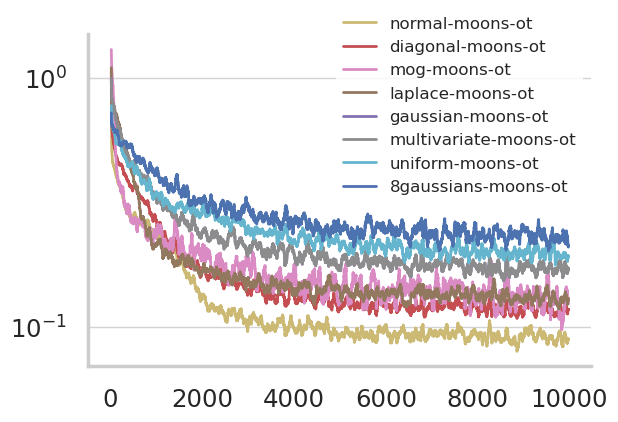

In [11]:
# plot losses.npy for every run
# apply smoothing to losses.npy
losses_smooth = {}
# first column is x=step, second column is y=loss
window_size = 51  # Use odd number to ensure equal padding on both sides
for run in _runsfiltered:
    # Apply smoothing separately to x and y columns
    x = losses[run][:, 0]  # time steps
    y = losses[run][:, 1]  # loss values
    # Smooth only the y values
    y_smooth = np.convolve(y, np.ones(window_size)/window_size, mode='valid')
    # Trim x and y_smooth to same length
    trim = (window_size - 1) // 2
    x = x[trim:-trim]
    # Verify lengths match
    assert len(x) == len(y_smooth), f"Length mismatch: x={len(x)}, y_smooth={len(y_smooth)}"
    # Recombine into array
    losses_smooth[run] = np.column_stack((x, y_smooth))

# subsample, only plot every n'th point
n = 1
losses_smooth = {run: losses_smooth[run][::n, :] for run in _runsfiltered}

set_seaborn_style()
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.set_yscale("log")
# sort runsfiltered by lowest final loss
_runsfiltered = sorted(_runsfiltered, key=lambda x: losses_smooth[x][-1, 1])
for run in _runsfiltered:
    ax.plot(
        losses_smooth[run][:, 0], losses_smooth[run][:, 1], label=run, linewidth=2,
        color=_cmap[run]
    )
set_style_after(ax, legend=True, loc="upper right", bbox_to_anchor=(1.0, 1.1), fs=12)
plt.show()
plt.close()

{'normal-moons-ot': 0.08914581700867298, 'diagonal-moons-ot': 0.11684693498354333, 'mog-moons-ot': 0.12371662156838997, 'laplace-moons-ot': 0.12974771857261658, 'gaussian-moons-ot': 0.1708737921481039, 'multivariate-moons-ot': 0.1708737921481039, 'uniform-moons-ot': 0.19243787331324, '8gaussians-moons-ot': 0.20906924076524436}
{'normal-moons-ot': -2.633063554763794, 'diagonal-moons-ot': -2.6071255207061768, 'mog-moons-ot': -2.8057005405426025, 'laplace-moons-ot': -2.589277744293213, 'gaussian-moons-ot': -2.7146642208099365, 'multivariate-moons-ot': -2.7146642208099365, 'uniform-moons-ot': -2.696904420852661, '8gaussians-moons-ot': -0.5668363571166992}
[[1.         0.54171101]
 [0.54171101 1.        ]]


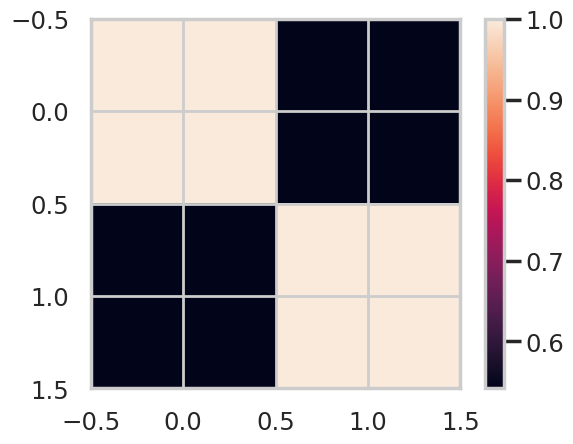

In [12]:
# plot correlation between lowest loss and highest (least negative) logprob_train
lowest_loss = {run: losses_smooth[run][-1, 1] for run in _runsfiltered}
highest_logprob = {run: logprobs_train[run][-1, 1] for run in _runsfiltered}

print(lowest_loss)
print(highest_logprob)

# plot correlation as heatmap
corr = np.corrcoef(list(lowest_loss.values()), list(highest_logprob.values()))
print(corr)
plt.imshow(corr)
plt.colorbar()
plt.show()
plt.close()


8gaussians-moons 1.0


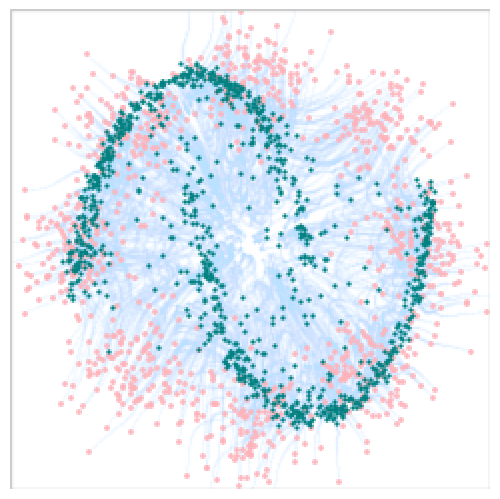

8gaussians-moons-ot 1.0


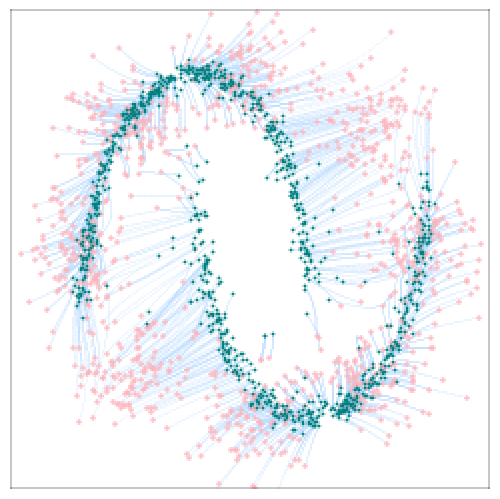

beta-moons 1.0


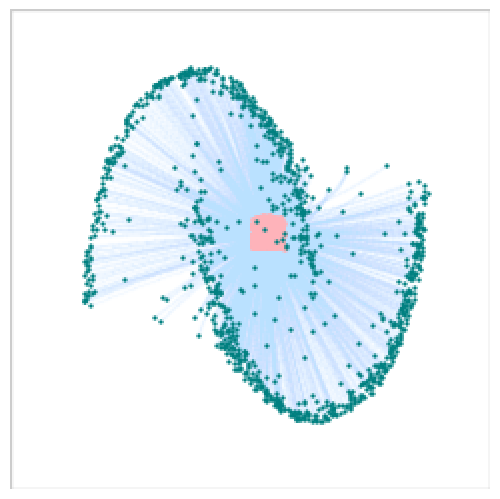

beta-moons-ot 1.0


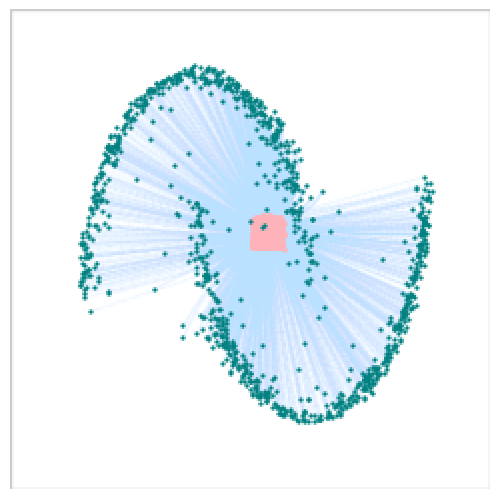

diagonal-moons 1.0


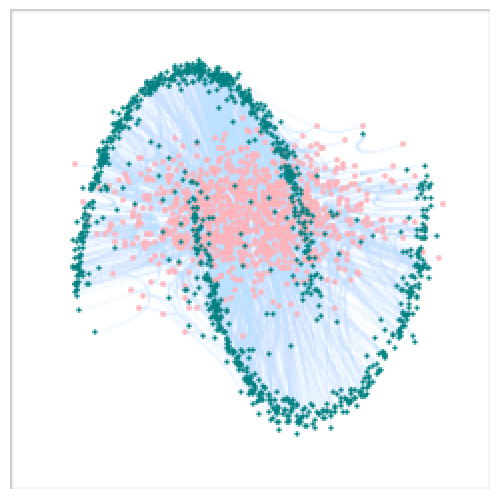

diagonal-moons-ot 1.0


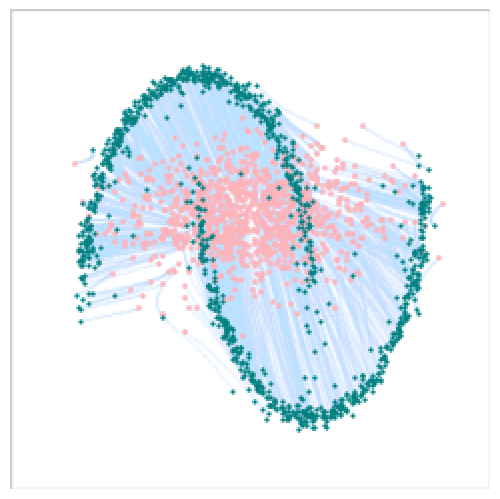

dirichlet-moons 1.0


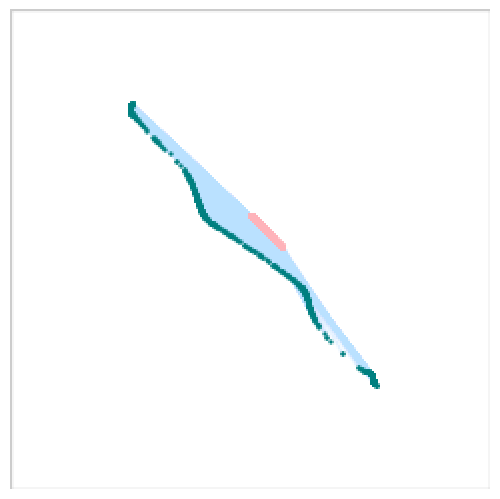

dirichlet-moons-ot 1.0


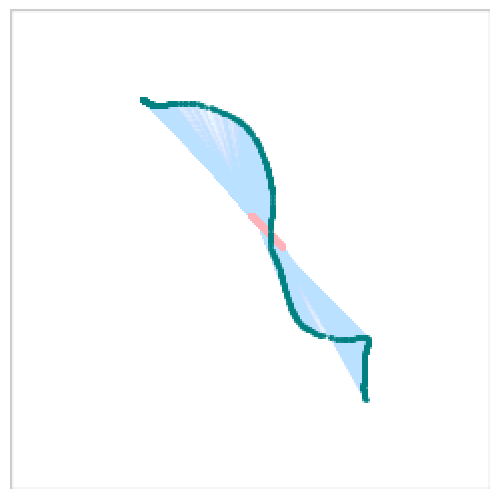

gamma-moons 1.0


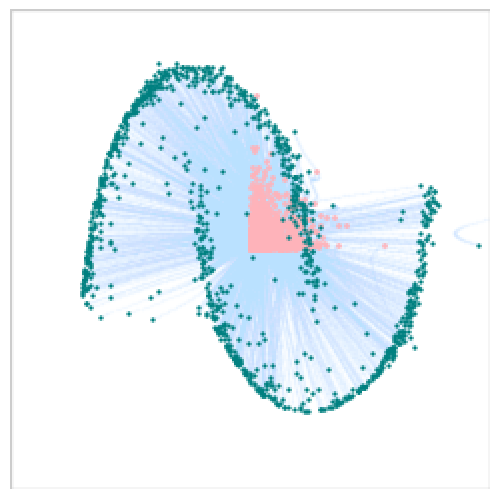

gamma-moons-ot 1.0


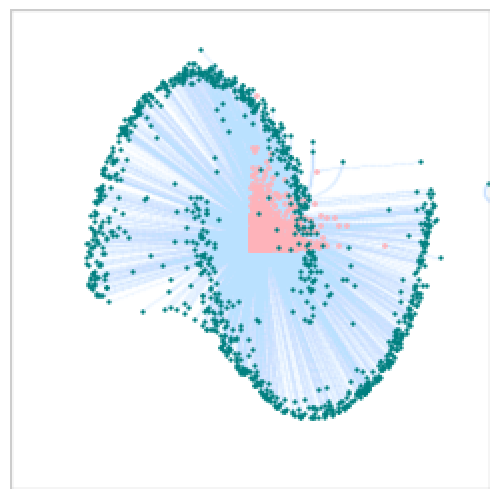

gaussian-moons 1.0


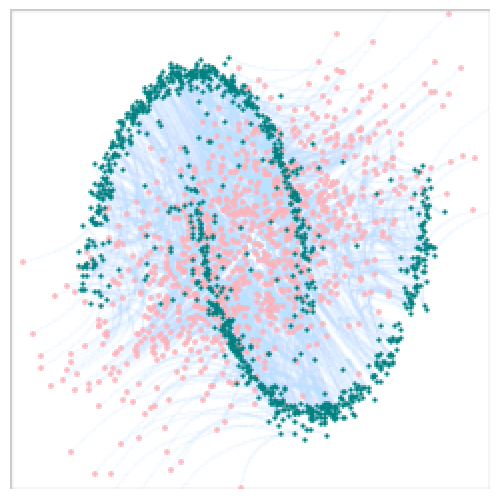

gaussian-moons-ot 1.0


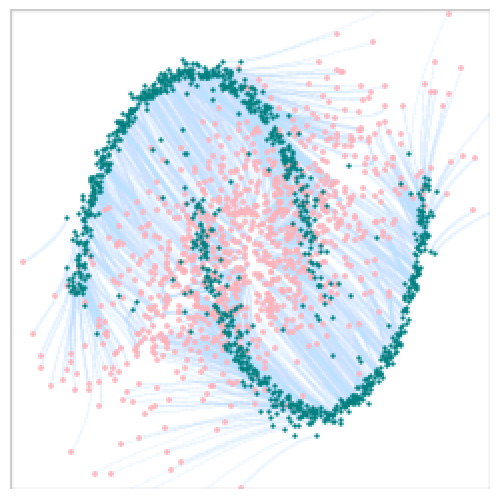

laplace-moons 1.0


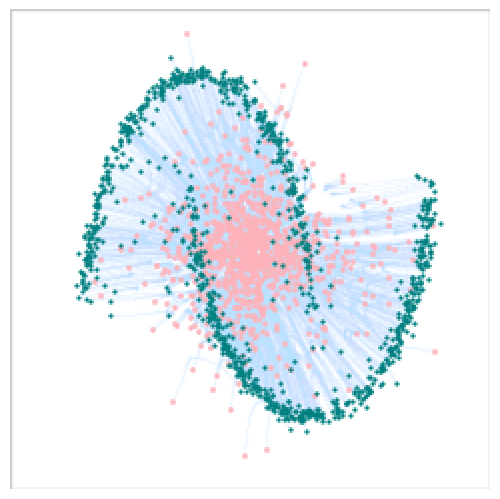

laplace-moons-ot 1.0


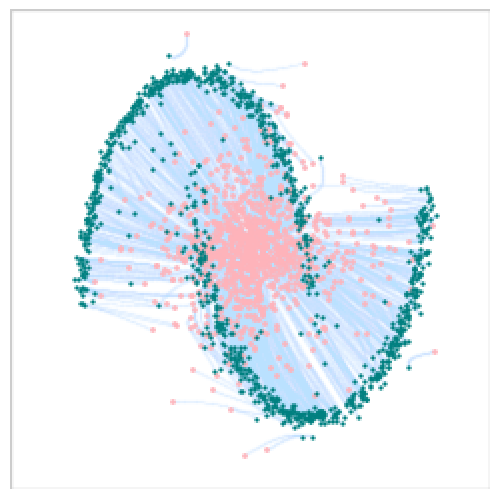

mog-moons 1.0


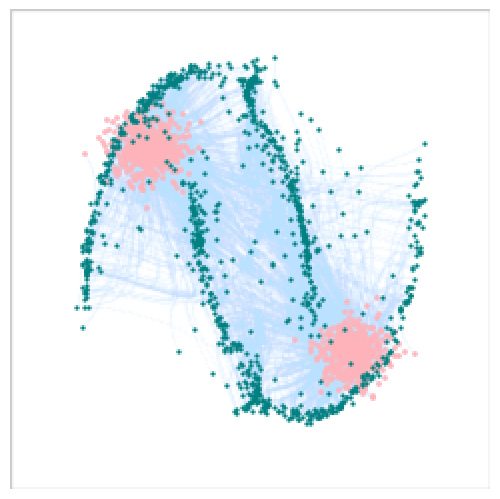

mog-moons-ot 1.0


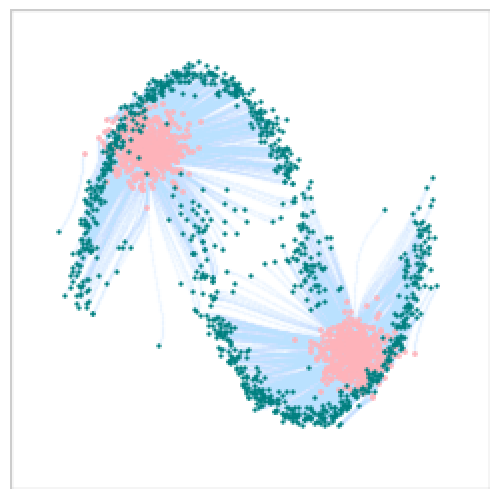

multivariate-moons 1.0


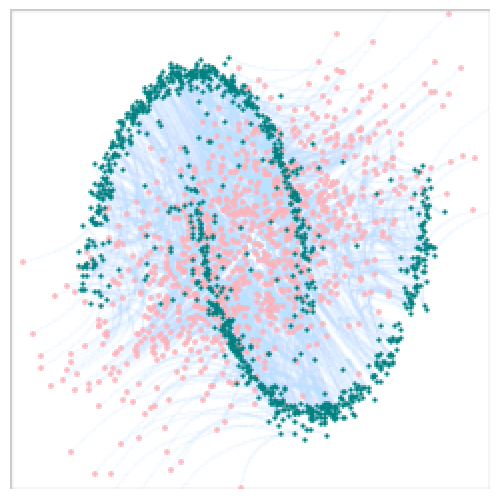

multivariate-moons-ot 1.0


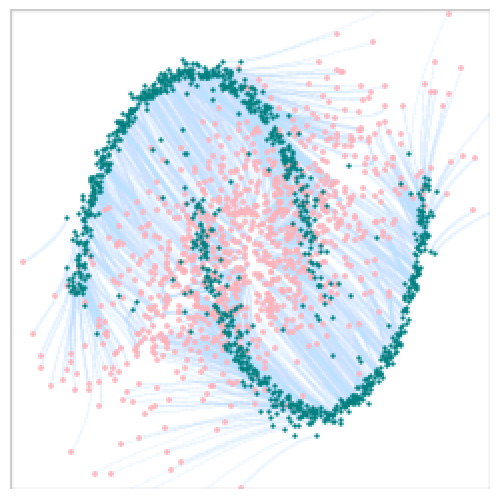

normal-moons 1.0


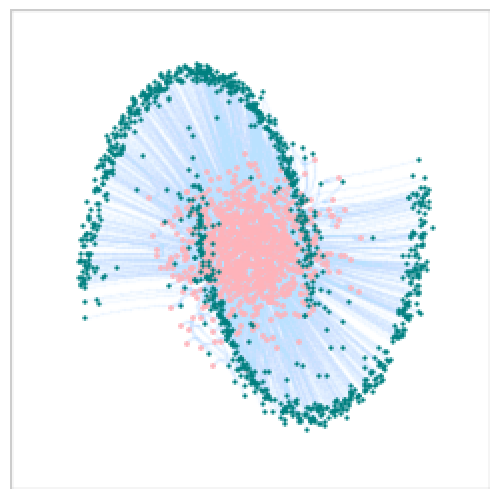

normal-moons-ot 1.0


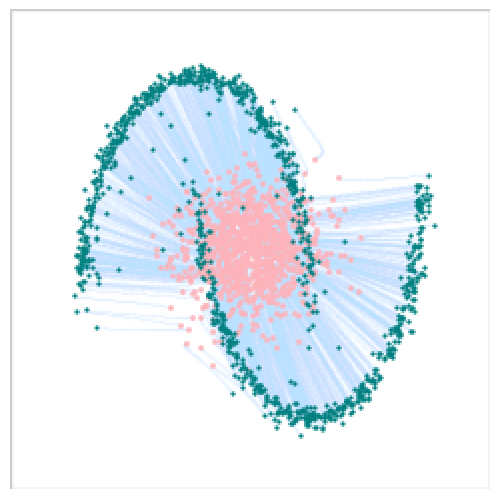

uniform-moons 1.0


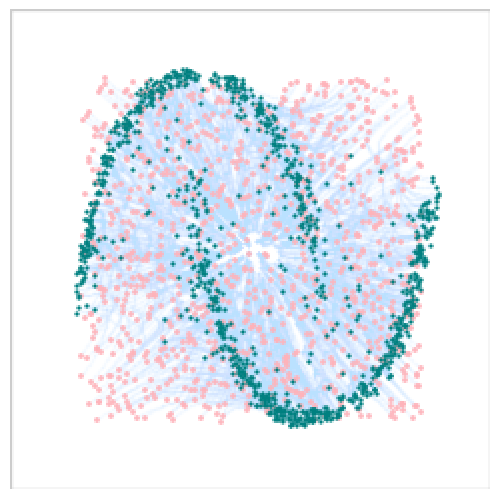

uniform-moons-ot 1.0


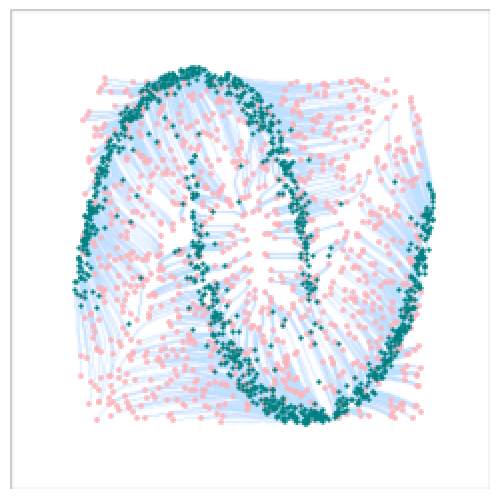

In [13]:
# plot the latest file in runs/<run>/trajectory/

for run in runs:
    _dir = f"{currentdir}/runs/{run}/trajectory/" 
    if os.path.exists(_dir):
        _files = os.listdir(_dir)
    else: 
        continue
    
    # time is in format _0.92.png
    _times = [float(file.split("_")[-1].split(".")[0]) for file in _files]
    latest_file = _files[_times.index(max(_times))]
    print(run, max(_times))
    
    fname = f"{currentdir}/runs/{run}/trajectory/{latest_file}"
    if os.path.exists(fname):
        plt.imshow(plt.imread(fname))
    else:
        print(f"File {fname} does not exist")
        continue
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    plt.close()

In [14]:
# choose a couple of runs and plot them side by side
plot_runs = ["normal-moons", "normal-moons-ot", "8gaussians-moons-ot"]



# MNIST

In [15]:
# list all runs in runs/
# Get current notebook path since __file__ isn't defined in notebooks
currentfile = os.path.abspath('')
currentdir = os.path.dirname(currentfile)
runs = os.listdir(f"{currentdir}/runs")
print(runs)

# filter for target distributions
targetdist = "mnist"
runs = [run for run in runs if f"-{targetdist}" in run]

# order alphabetically
runs = sorted(runs)
print(runs)


['gaussian-mnist-ot', 'beta-moons', 'beta-moons-ot', 'gaussian-moons', 'datafittednormal-mnist-ot', 'multivariate-mnist-ot', 'gamma-mnist-ot', 'dirichlet-moons-ot', 'gamma-moons', 'mog-moons', 'diagonal-moons-ot', 'laplace-mnist-ot', '8gaussians-mnist-ot', 'cauchy-moons', 'multivariate-moons', '8gaussians-mnist', 'laplace-mnist', 'gamma-mnist', 'normal-moons-ot', 'beta-mnist-ot', 'diagonal-moons', 'beta-mnist', 'multivariate-moons-ot', 'dirichlet-moons', '8gaussians-moons', 'diagonal-mnist', 'mog-mnist-ot', 'multivariate-mnist', 'uniform-mnist-ot', 'uniform-moons-ot', 'gaussian-moons-ot', 'normal-mnist-ot', 'gaussian-mnist', 'datafittednormal-mnist', 'cauchy-moons-ot', 'diagonal-mnist-ot', 'laplace-moons-ot', 'mog-mnist', 'laplace-moons', '8gaussians-moons-ot', 'uniform-moons', 'gamma-moons-ot', 'datafittednormal-moons-ot', 'uniform-mnist', 'normal-mnist', 'normal-moons', 'mog-moons-ot']
['8gaussians-mnist', '8gaussians-mnist-ot', 'beta-mnist', 'beta-mnist-ot', 'datafittednormal-mnist'

In [16]:
# list files in first run
files = os.listdir(f"{currentdir}/runs/{runs[4]}")
print(files)


['traj_2999_is100.png', 'train', 'gif', 'traj_1499_is100.png', 'intsteps_gen.png', 'traj_499_is100.png', 'losses.npy', 'traj_1999_is100.png', 'traj_3499_is100.png', 'traj_datafittednormal-to-mnist_is11.gif', 'traj_999_is100.png', 'traj_0_is100.png', 'integrationsteps', 'traj_2499_is100.png', 'traj_4499_is100.png', 'tcfmunet_4680.pth', 'traj_3999_is100.png', 'intsteps_list.npy']


In [17]:
exclude = ["dirichlet", "beta", "gamma", "multivariate"]
filtered_runs = [run for run in runs if not any(e in run for e in exclude)]


In [18]:
# get logprobs_train.npy and losses.npy for every run into a dict
logprobs_train = {}
losses = {}
for run in runsfiltered:
    fname = f"{currentdir}/runs/{run}/losses.npy"
    if os.path.exists(fname):
        # logprobs_train[run] = np.load(f"{currentdir}/runs/{run}/logprobs_train.npy")
        losses[run] = np.load(fname)

runsfiltered = losses.keys()


In [19]:
# every model its own color
colors = sns.color_palette("deep", len(runsfiltered))
_cmap = {run: colors[i] for i, run in enumerate(runsfiltered)}

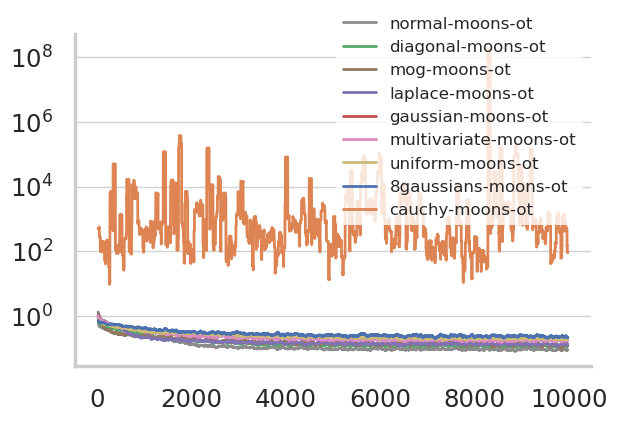

In [20]:
# plot losses.npy for every run
# apply smoothing to losses.npy
losses_smooth = {}
# first column is x=step, second column is y=loss
window_size = 51  # Use odd number to ensure equal padding on both sides
for run in runsfiltered:
    # Apply smoothing separately to x and y columns
    x = losses[run][:, 0]  # time steps
    y = losses[run][:, 1]  # loss values
    # Smooth only the y values
    y_smooth = np.convolve(y, np.ones(window_size)/window_size, mode='valid')
    # Trim x and y_smooth to same length
    trim = (window_size - 1) // 2
    x = x[trim:-trim]
    # Verify lengths match
    assert len(x) == len(y_smooth), f"Length mismatch: x={len(x)}, y_smooth={len(y_smooth)}"
    # Recombine into array
    losses_smooth[run] = np.column_stack((x, y_smooth))

# subsample, only plot every n'th point
n = 1
losses_smooth = {run: losses_smooth[run][::n, :] for run in runsfiltered}

set_seaborn_style()
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.set_yscale("log")
# sort runsfiltered by lowest final loss
_runsfiltered = sorted(runsfiltered, key=lambda x: losses_smooth[x][-1, 1])
for run in _runsfiltered:
    ax.plot(
        losses_smooth[run][:, 0], losses_smooth[run][:, 1], label=run, linewidth=2,
        color=_cmap[run]
    )
set_style_after(ax, legend=True, loc="upper right", bbox_to_anchor=(1.0, 1.1), fs=12)
plt.show()
plt.close()

In [21]:
# get NFE for every run
nfe = {}
for run in runsfiltered:
    fname = f"{currentdir}/runs/{run}/integrationsteps/nfe.npy"
    if os.path.exists(fname):
        nfe[run] = np.load(fname)
    else:
        print(f"File {fname} does not exist")
        continue
print(nfe)

{'8gaussians-moons-ot': array(20), 'cauchy-moons-ot': array(32), 'diagonal-moons-ot': array(20), 'gaussian-moons-ot': array(20), 'laplace-moons-ot': array(20), 'mog-moons-ot': array(20), 'multivariate-moons-ot': array(20), 'normal-moons-ot': array(20), 'uniform-moons-ot': array(20)}
